### GRAPE calculation of control fields for cnot implementation

[This is an updated implementation based on the deprecated notebook of GRAPE CNOT implementation by Robert Johansson](https://nbviewer.org/github/qutip/qutip-notebooks/blob/master/examples/control-grape-cnot.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import qutip as qt
# the library for quantum control
import qutip_qtrl.pulseoptim as qtrl

In [ ]:
# total duration
T = 2 * np.pi 
# number of time steps
times = np.linspace(0, T, 500)

In [ ]:
U_0 = qt.operators.identity(4)
U_target = qt.core.gates.cnot()

### Starting Point

In [5]:
U_0

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Target Operator

In [6]:
U_target


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [ ]:
# Drift Hamiltonian
g = np.pi/(4 * T)
H_drift = g * (qt.tensor(qt.sigmax(), qt.sigmax()) + qt.tensor(qt.sigmay(), qt.sigmay()))

In [15]:
H_drift

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.   0.   0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.   0.  ]]

In [16]:
H_ctrl = [qt.tensor(qt.sigmax(), qt.identity(2)),
         qt.tensor(qt.sigmay(), qt.identity(2)),
         qt.tensor(qt.sigmaz(), qt.identity(2)),
         qt.tensor(qt.identity(2), qt.sigmax()),
         qt.tensor(qt.identity(2), qt.sigmay()),
         qt.tensor(qt.identity(2), qt.sigmaz()),
         qt.tensor(qt.sigmax(), qt.sigmax()),
         qt.tensor(qt.sigmay(), qt.sigmay()),
         qt.tensor(qt.sigmaz(), qt.sigmaz())] 

In [17]:
H_ctrl

[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0.+0.j 0.+0.j 0.-1.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+1.j 0.+0.j 0.+0.j]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[ 1.  0.  0.  0.]
  [ 0.  1.  0.  0.]
  [ 0.  0. -1.  0.]
  [ 0.  0.  0. -1.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+0.j 0.+0.j 0.+1.j 0.+0.j]],
 Quantum ob

In [18]:
H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$',
            r'$u_{2x}$', r'$u_{2y}$', r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

## GRAPE

In [55]:
result = qtrl.optimize_pulse_unitary(
    H_drift,
    H_ctrl,
    U_0,
    U_target,
    num_tslots=500,
    evo_time=(2*np.pi),
    #this attribute is crucial for convergence!!
    amp_lbound=-(2 * np.pi * 0.05),
    amp_ubound=(2 * np.pi * 0.05),
    fid_err_targ=1e-9,
    max_iter=500,
    max_wall_time=60,
    alg="GRAPE",
    optim_method="FMIN_L_BFGS_B",
    method_params={
        "disp": True,
        "maxiter": 1000,
    }
)

In [56]:
for attr in dir(result):
    if not attr.startswith("_"):
        print(f"{attr}: {getattr(result, attr)}")

# --> array[num_tslots, n_ctrls]
print(np.shape(result.final_amps))

evo_full_final: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07109899e-01+7.07103663e-01j  5.56890821e-06+4.26323697e-06j
   3.53420960e-06-7.28807932e-07j -2.98237406e-06+6.44645024e-06j]
 [-4.26333605e-06-5.56891496e-06j  7.07109366e-01+7.07104196e-01j
   1.49295094e-06-3.89133074e-06j -3.94526858e-06+7.37011402e-06j]
 [-6.44641525e-06+2.98233284e-06j -7.37018237e-06+3.94525584e-06j
   5.90246396e-07-2.54883838e-06j  7.07101045e-01+7.07112517e-01j]
 [ 7.28761444e-07-3.53418763e-06j  3.89132557e-06-1.49296878e-06j
   7.07106814e-01+7.07106748e-01j  2.54888986e-06-5.90202113e-07j]]
evo_full_initial: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.98507552+8.23025368e-02j -0.02776388+7.96684253e-02j
  -0.03121497-2.11708480e-02j  0.01758629+1.18333283e-01j]
 [-0.00123546-2.75803841e-02j  0.14943698+1.99775200e-04j
  -0.00158022-9.79703212e-01j -0.0858843 -9.85360436e-02j]
 [ 

## Plot control fields for cnot gate in the presense of single-qubit tunnelling

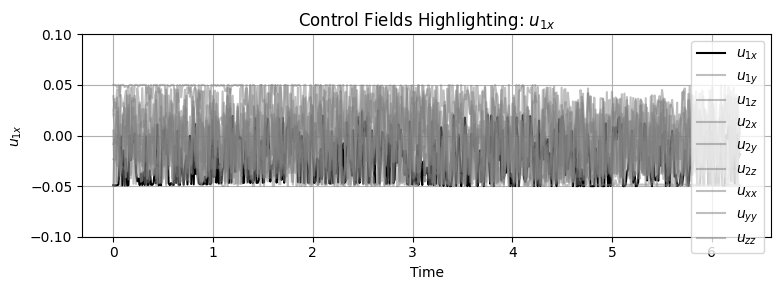

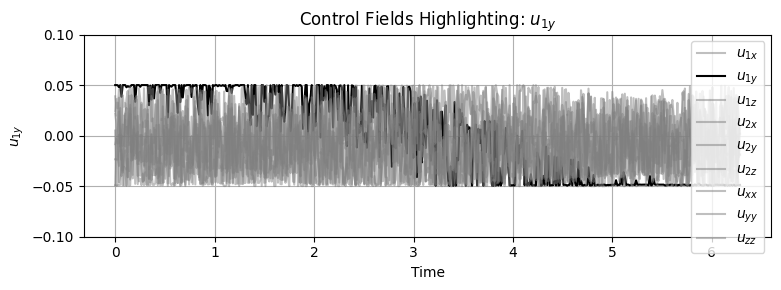

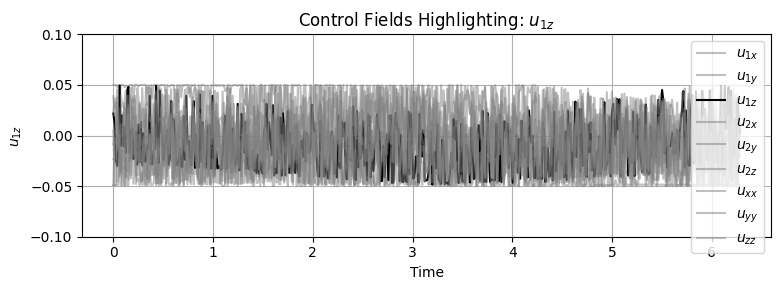

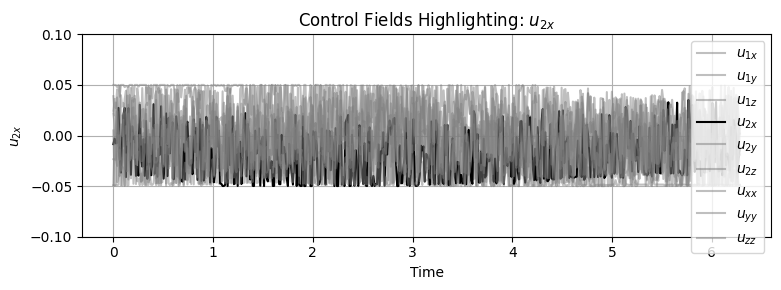

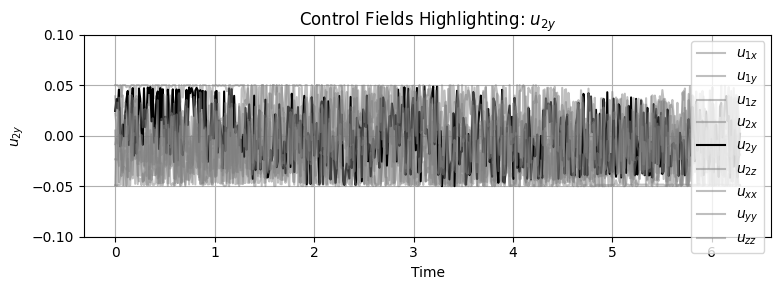

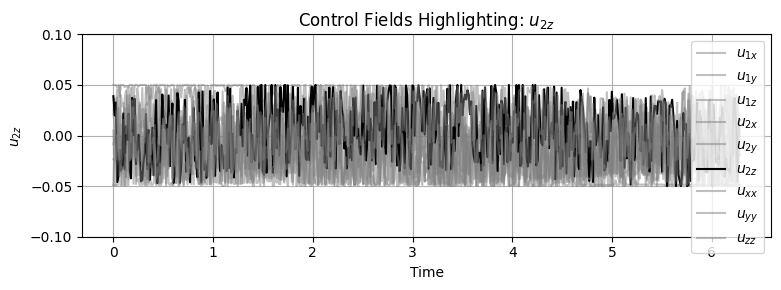

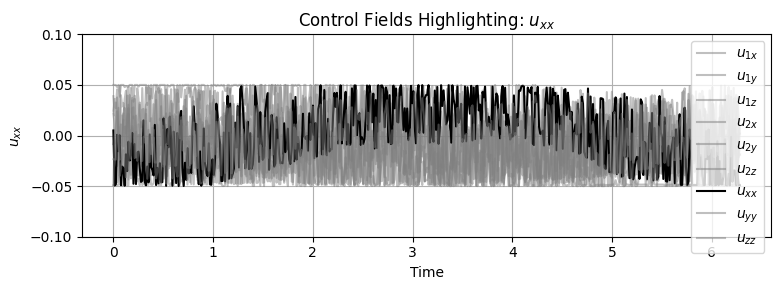

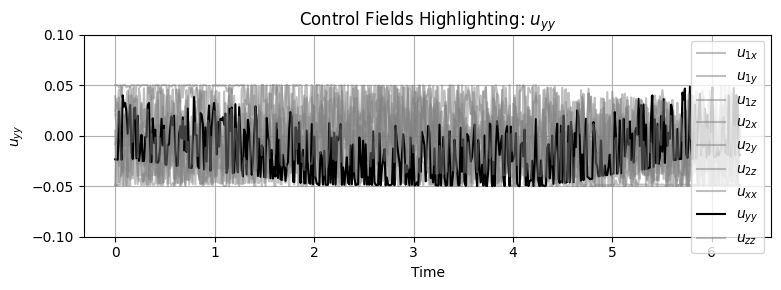

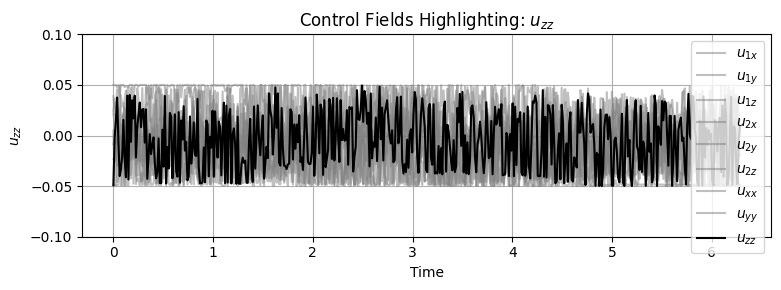

In [87]:
def plot_control_amplitudes(times, final_amps, labels, uniform_axes=True):
    num_controls = final_amps.shape[1]
    
    if uniform_axes:
        y_max = 0.1  # Fixed y-axis scale
        y_min = -0.1
        
        for i in range(num_controls):
            fig, ax = plt.subplots(figsize=(8, 3))
            
            for j in range(num_controls):
                color = 'black' if i == j else 'gray'  # Highlight the current control
                alpha = 1.0 if i == j else 0.5
                ax.plot(times, final_amps[:, j], label=labels[j], color=color, alpha=alpha)
            ax.set_title(f"Control Fields Highlighting: {labels[i]}")
            ax.set_xlabel("Time")
            ax.set_ylabel(labels[i])
            ax.set_ylim(y_min, y_max)  # Set fixed y-axis limits
            ax.grid(True)
            ax.legend()
            plt.tight_layout()
            plt.show()
    else:
        for i in range(num_controls):
            fig, ax = plt.subplots(figsize=(8, 3))
            ax.plot(times, final_amps[:, i], label=labels[i])
            ax.set_title(f"Control Field: {labels[i]}")
            ax.set_xlabel("Time")
            ax.set_ylabel(labels[i])
            ax.grid(True)
            ax.legend()
            plt.tight_layout()
            plt.show()
        

plot_control_amplitudes(times, result.final_amps / (2 * np.pi), H_labels, True)


## Fidelity/overlap

In [ ]:
#initially its dimensions where [[2,2],[2,2]]
U_target = qt.Qobj(U_target.data, dims=[[4], [4]])
U_target

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [77]:
np.shape(U_target)

(4, 4)

In [78]:
U_f=result.evo_full_final

In [79]:
U_f

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07109899e-01+7.07103663e-01j  5.56890821e-06+4.26323697e-06j
   3.53420960e-06-7.28807932e-07j -2.98237406e-06+6.44645024e-06j]
 [-4.26333605e-06-5.56891496e-06j  7.07109366e-01+7.07104196e-01j
   1.49295094e-06-3.89133074e-06j -3.94526858e-06+7.37011402e-06j]
 [-6.44641525e-06+2.98233284e-06j -7.37018237e-06+3.94525584e-06j
   5.90246396e-07-2.54883838e-06j  7.07101045e-01+7.07112517e-01j]
 [ 7.28761444e-07-3.53418763e-06j  3.89132557e-06-1.49296878e-06j
   7.07106814e-01+7.07106748e-01j  2.54888986e-06-5.90202113e-07j]]

In [ ]:
def overlap(U_target, U_f):
    """
    Calculate the overlap between the target unitary U_target and the final unitary U_f.

    Parameters:
    U_target (qutip.Qobj): Target unitary operator.
    U_f (qutip.Qobj): Final unitary operator.

    Returns:
    float: Real part of the overlap value.
    float: Fidelity (absolute square of the overlap).
    """
    # dividing over U_target.shape[0] is for normalization
    overlap_value = (U_target.dag() * U_f).tr() / U_target.shape[0]
    fidelity = abs(overlap_value) ** 2
    return overlap_value.real, fidelity

# Example usage
overlap_real, fidelity = overlap(U_target, U_f)
print(f"Overlap (real part): {overlap_real}")
print(f"Fidelity: {fidelity}")

Overlap (real part): 0.7071067811412814
Fidelity: 0.9999999998719598


In [60]:
np.shape(U_f)

(4, 4)

## Proceess tomography

Quantum Process Tomography (QPT) is a technique used to characterize an unknown quantum operation by reconstructing its process matrix (also called the χ (chi) matrix). This matrix describes how an input quantum state is transformed by the operation.

Defines the basis operators 
{
𝐼
,
𝑋
,
𝑌
,
𝑍
}
for the two-qubit system.

These operators form a complete basis to describe any quantum operation in the Pauli basis.

### Ideal cnot gate

In [64]:
op_basis = [[qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

U_target is the ideal CNOT gate.

qt.to_super(U_target) converts it into superoperator form, which is necessary for QPT.

qt.qpt(U_i_s, op_basis) computes the χ matrix for the ideal gate.

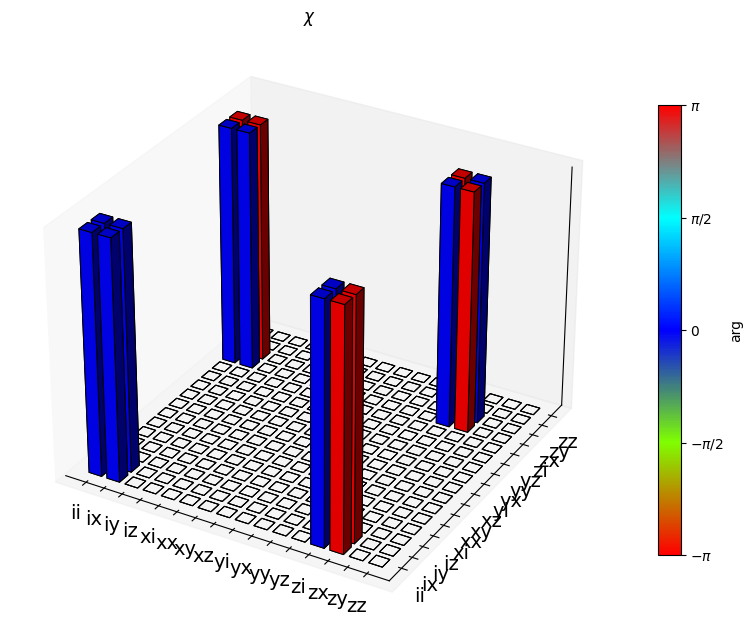

In [65]:
fig = plt.figure(figsize=(12,6))

U_i_s = qt.to_super(U_target)

chi = qt.qpt(U_i_s, op_basis)

fig = qt.qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

In [61]:
op_basis = [[qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

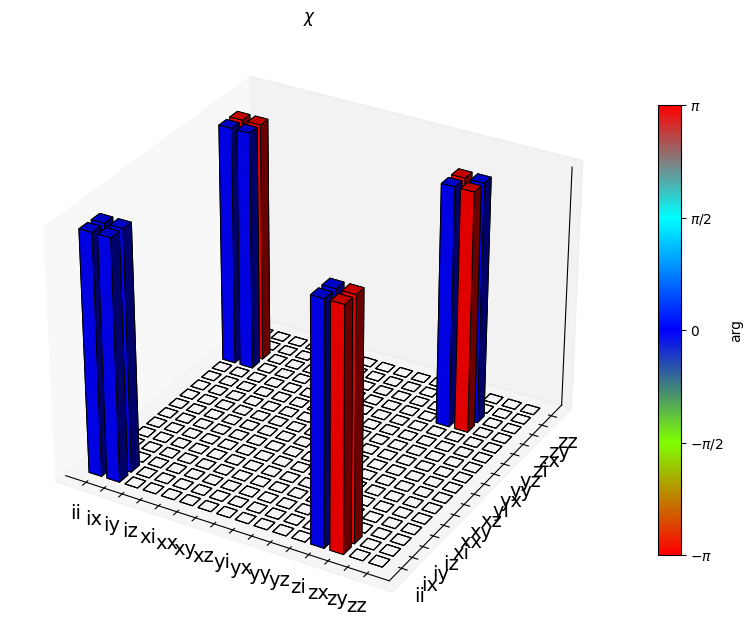

In [62]:
fig = plt.figure(figsize=(12,6))

U_f_s = qt.to_super(U_f)

chi = qt.qpt(U_f_s, op_basis)

fig = qt.qpt_plot_combined(chi, op_label, fig=fig, threshold=0.01)

## Versions


In [66]:
from qutip.ipynbtools import version_table

version_table()